In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.figure import Figure
%matplotlib inline
#%matplotlib nbagg


import ipywidgets as widgets
from IPython.display import display

# Matplotlib 

## Controlling the appearance 

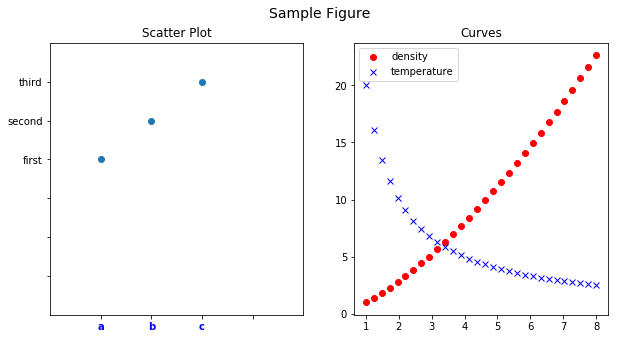

In [2]:
# Initialize the figure and subplot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Titles
fig.suptitle('Sample Figure', fontsize=14)
ax1.set_title("Scatter Plot", fontsize='large')
ax2.set_title("Curves", fontsize='large')

# Set the limits
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 7)

# ticks and labels
ax1.set_xticks([1,2,3,4])
ax1.set_yticks([1,2,3,4,5,6])
ax1.set_xticklabels(['a', 'b', 'c'])
ax1.set_yticklabels(['','','','first', 'second', 'third'])

# plot
ax1.scatter([1,2,3], [4,5,6])
x = np.linspace(1., 8., 30)
ax2.plot(x, x ** 1.5, 'ro', label='density')
ax2.plot(x, 20/x, 'bx', label='temperature')
ax2.legend()

# Retrieve an element of a plot and set properties
for tick in ax1.xaxis.get_ticklabels():
    tick.set_weight('bold')
    tick.set_color('blue')
    
# You can also change the global setting
plt.rc('xtick', labelsize='medium', direction='out', color='r')
plt.rc('xtick.major', size=4, pad=4)
plt.show()

fig.savefig('datavs.png', bbox_inches='tight')

In [3]:
# closing activities
plt.close(fig)
plt.rcdefaults()

## Twin Axis

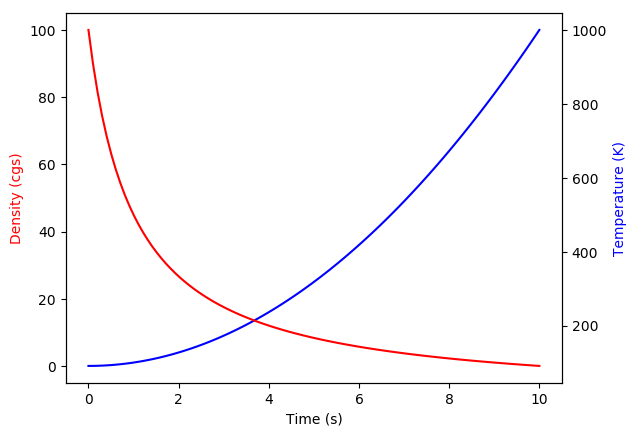

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(t, t ** 2, 'b-')
ax2.plot(t, 1000 / (t + 1), 'r-')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')

## Inserting subplots

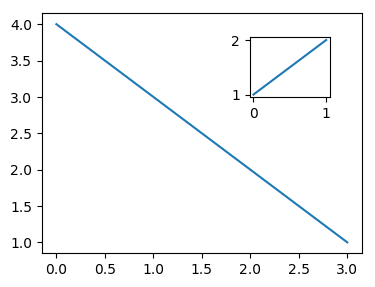

In [5]:
fig = plt.figure(figsize=(4,3))  # create the figure with size (width,height)
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot([4,3,2,1])
ax2 = fig.add_axes([0.62,0.62,0.20,0.20])
ax2.plot([1,2])
plt.show()


## Color Bars

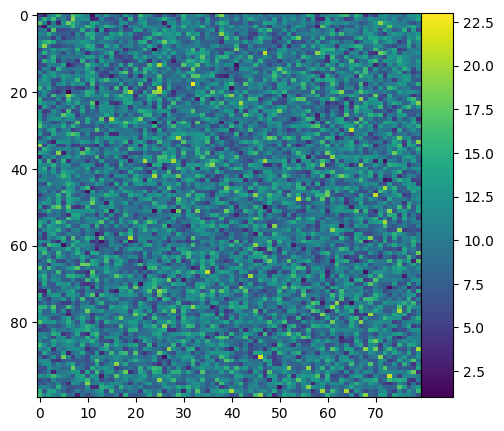

In [6]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.6,0.8])
image = np.random.poisson(10., (100, 80))
i = ax.imshow(image, aspect='auto', interpolation='nearest')
colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
fig.colorbar(i, cax=colorbar_ax)

## Artists, Patches, and Lines

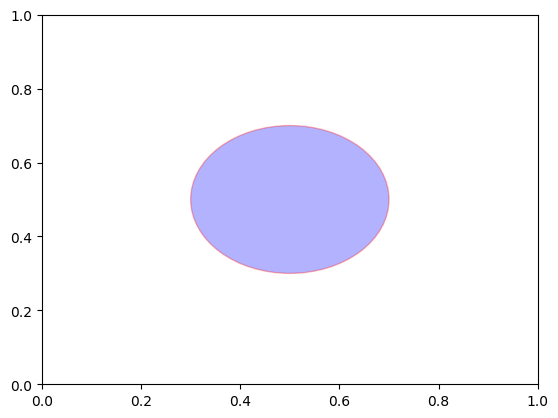

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
c = Circle((0.5, 0.5), radius=0.2,
            edgecolor='red', facecolor='blue', alpha=0.3)
ax.add_patch(c)
plt.show()


# Interactive Graphs

## ipyWidgets 

### Example : Sine Wave

$A = amplitude$

$\phi = phase$

$\nu = frequency$

$A \sin (2\pi(\nu x + \phi))$

In [8]:
def update_plot(amp=1, phase=1, freq=1):
    '''
    This function is linked to the sliders, and
    it replots the sine wave when sliders are changed
    '''
    plt.suptitle('Sine Wave')
    x = np.linspace(0, 2, 1000)
    y = amp + np.sin(2 * np.pi * (freq * x + phase))
    
    plt.plot(x,y)
    plt.show()
  
amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase= widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')

widgets.interact(update_plot, amp=amp, phase=phase, freq=freq)


interactive(children=(FloatSlider(value=1.0, description='Amp:', max=10.0, min=1.0), FloatSlider(value=0.0, description='Phase:', max=5.0), FloatSlider(value=1.0, description='Freq:', max=10.0, min=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.update_plot>

### Example : Polynomial

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.g>

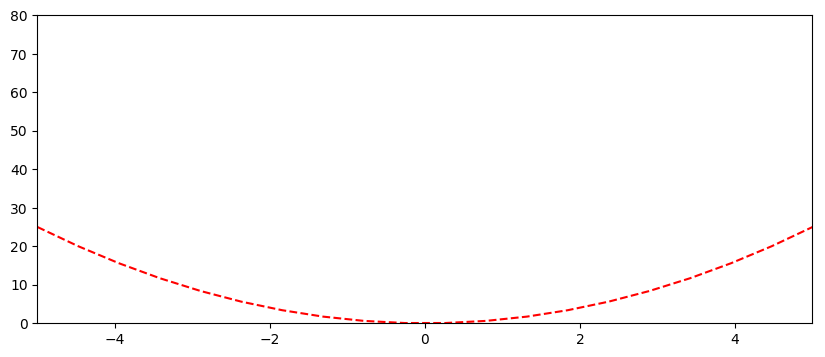

In [9]:
# This example show an additional axis
fig, ax = plt.subplots(1, figsize=(10,4))
   
def g(c=10):
    x = np.linspace(-5, 5, 20)
    y = c * x**2
    ax.clear()
    ax.plot(x,y,'r--')
    ax.set_xlim([-5,5])
    ax.set_ylim([0,80])
    fig.canvas.draw()
    #plt.show()
    display(fig)

c_slide = widgets.FloatSlider(value=1.0, min=0, max=3, step=0.1)
widgets.interact(g, c=c_slide)